# Pandas DataFrame plotting with Highcharts

[pandas_highcharts](https://github.com/gtnx/pandas-highcharts) is a Python library to turn your pandas DataFrame into a suited JSON for [Highcharts](http://www.highcharts.com/), a Javascript library for interactive charts.

Before introducing Highcharts, I build an arbitrary `DataFrame` with a timeseries (a Brownian motion), plot it with matplotlib, then seaborn and Highcharts.

## Import

In [1]:
%matplotlib inline
import string

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import numpy as np
import pandas as pd

In [3]:
print pd.__version__

0.17.0


## Build a DataFrame with a timeseries

In [4]:
# Dimensions
nb_rand_var = 8
nb_dates = 220
np.random.seed(4321)
# Random choice letters
pickme = lambda x: np.random.choice(26, x, replace=False)
labels = np.array(list(string.ascii_uppercase))[pickme(nb_rand_var)]

In [5]:
labels

array(['P', 'W', 'Z', 'E', 'K', 'U', 'O', 'M'], 
      dtype='|S1')

In [6]:
# Timeseries
ts = pd.date_range("2015-03-23", periods=nb_dates, freq="B")
ts

DatetimeIndex(['2015-03-23', '2015-03-24', '2015-03-25', '2015-03-26',
               '2015-03-27', '2015-03-30', '2015-03-31', '2015-04-01',
               '2015-04-02', '2015-04-03',
               ...
               '2016-01-11', '2016-01-12', '2016-01-13', '2016-01-14',
               '2016-01-15', '2016-01-18', '2016-01-19', '2016-01-20',
               '2016-01-21', '2016-01-22'],
              dtype='datetime64[ns]', length=220, freq='B')

In [7]:
# A Brownian Motion
noise = np.random.randn(nb_dates, nb_rand_var)
df = pd.DataFrame(noise.cumsum(axis=0),
                  index=ts,
                  columns=labels)

In [8]:
df.head()

,P,W,Z,E,K,U,O,M
2015-03-23,-0.418212,-0.917607,-0.187494,-0.633002,0.687064,0.086552,-0.509790,-1.630820
2015-03-24,-0.804698,-1.634806,-0.515568,-0.875124,1.083955,-0.944506,-0.088891,-2.439104
2015-03-25,-1.246270,-0.882964,1.016304,-1.381058,1.300831,-0.932484,-1.466252,-1.004706
2015-03-26,-2.353867,-0.721007,2.028381,-0.977233,-0.696400,-1.889799,-1.523532,-2.083549
2015-03-27,-4.305895,-1.439609,0.561285,-0.661809,0.100659,-3.491839,-1.962939,-2.552511


## Plotting with matplotlib

In [9]:
import matplotlib.pyplot as plt
plt.style.use("ggplot") # only for matplotlib >= 1.4

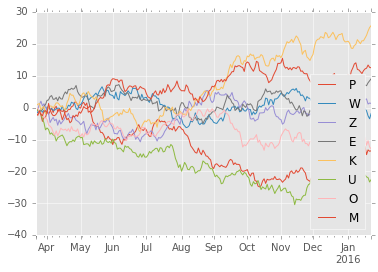

In [10]:
df.plot();

Even if the figure is nicer than the matplotlib default style, I think it's to small, and legends don't fit when the number of variables is higher than 5 or 6.

## Plotting with seaborn

Just a try with [seaborn](http://stanford.edu/~mwaskom/software/seaborn/introduction.html).

In [11]:
import seaborn as sns

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


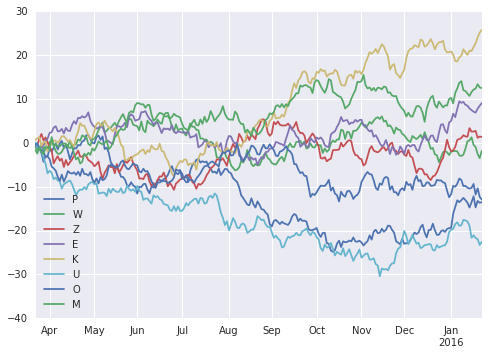

In [12]:
with sns.axes_style("darkgrid"):
    df.plot()

The colors palette, the figure size and the legends position are OK for me.

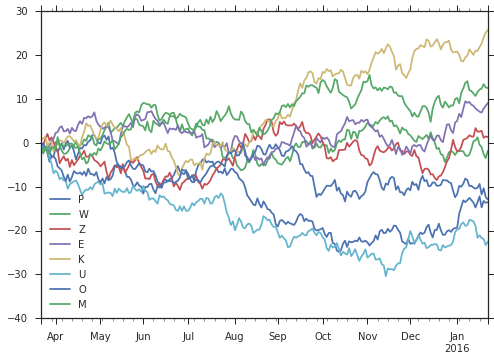

In [13]:
with sns.axes_style("ticks"):
    df.plot()

## Let's go with Highcharts

In [14]:
from pandas_highcharts.display import display_charts

In [15]:
display_charts(df, title="Brownian Motion")

default
javascript
serialize... now!


You can also retrieve the JSON data generated by *pandas_highcharts* thanks to the function `serialize`.

In [16]:
from pandas_highcharts.core import serialize

Serialize the previous `DataFrame` with the pandas_highcharts function `serialize`.

In [17]:
json_data = serialize(df, render_to="brownian", title="Brownian Motion")

default
javascript
serialize... now!


In [18]:
type(json_data)

str

And display the charts thanks to the HTML renderer and the function `display` of IPython

In [19]:
from IPython.core.display import display, HTML

In [20]:
display(HTML("""<div id="{chart_id}"</div>
<script type="text/javascript">{data}</script>""".format(chart_id="brownian", data=json_data)))

## Try to change some parameters

You can also retrive the related Python dict before getting the JSON version. You'll have the same structure as Highcharts options and can change some parameters.

In [21]:
data = serialize(df, render_to="brownian", output_type="dict")

default
dict
serialize... now!
returning dict...


In [22]:
data.keys()

['series', 'yAxis', 'chart', 'xAxis', 'legend']

In [23]:
data["chart"]

{'renderTo': 'brownian'}

In [24]:
data["legend"]

{'enabled': True}

Add a subtitle

In [25]:
data["subtitle"] = {"text": "a subtitle here..."}

Change the chart type

In [26]:
data["chart"]["type"] = "spline"

In [27]:
data["plotOptions"] = {"spline": {
     "lineWidth": 2,
     "states": {
     "hover": {
     "lineWidth": 3}
     }}}

In [28]:
data['chart']['type'] = 'line'
data['chart']['zoomType'] = 'x'
data['chart']['panning'] = True
data['chart']['panKey'] = 'shift'

In [29]:
data["chart"]["renderTo"] = "new_brownian"

In [30]:
print data["chart"]
print data["subtitle"]
print data["yAxis"]

{'panning': True, 'zoomType': 'x', 'panKey': 'shift', 'renderTo': 'new_brownian', 'type': 'line'}
{'text': 'a subtitle here...'}
[{}]


Serialize this new dict.

In [31]:
from pandas_highcharts.core import json_encode

In [32]:
json_data_2 = "new Highcharts.StockChart(%s);" % json_encode(data)

In [33]:
display(HTML("""<div id="{chart_id}"</div>
<script type="text/javascript">{data}</script>""".format(chart_id="new_brownian", data=json_data_2)))